<h1>Playground in order to test various functionalities</h1>

In [1]:
# Local Project Python Files
from src.data_loader import DataSplitter
from src.data_loader.DatasetDownloader import DatasetDownloader
from src.data_loader.FaceRecognitionDataset import FaceRecognitionDataset

# General Python libraries
import os, sys
import random

# Computer Vision Libraries
from PIL import Image, ImageFilter  
import matplotlib.pyplot as plt

In [2]:
# DatasetDownloader(dataset_dir="src/data/celeba_dataset/images",
#                   url='https://drive.google.com/uc?id=1-gkTnvMb8ojsW1cFFkL4JA1CAy1xa6UH',
#                   filename="images.zip", unzip=True)

# DatasetDownloader(dataset_dir="src/data/celeba_dataset",
#                   url='https://drive.google.com/uc?id=1Y3LkdANNDsdq_6_Vwkauz_CzUCuXrSmX',
#                   filename="labels.txt", unzip=False)

In [3]:
dataset = FaceRecognitionDataset(dataset_dir='src/data/celeba_dataset/images', labels_path='src/data/celeba_dataset/labels.txt')
train_dataset, val_dataset = DataSplitter.split_train_test(dataset, val_ratio=0.3)
print(f'Trainings data set - length: {len(train_dataset)} - type: {type(train_dataset)}')
print(f'Validation data set - length: {len(val_dataset)} - type: {type(val_dataset)}')

Trainings data set - length: 7000 - type: <class 'torch.utils.data.dataset.Subset'>
Validation data set - length: 3000 - type: <class 'torch.utils.data.dataset.Subset'>


In [4]:
# Get random indices
rand_idx = [random.randint(1,len(train_dataset)) for i in range(6)]

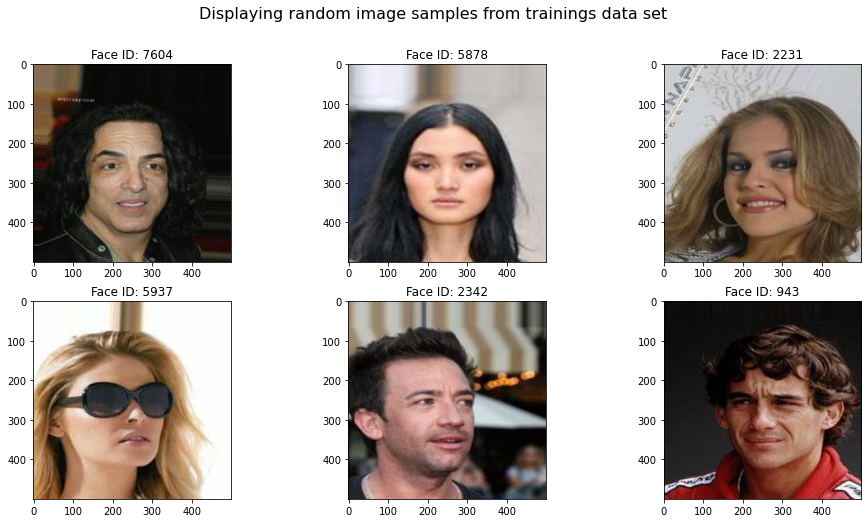

In [5]:
# Random image samples from data set
rows, columns = (2, 3)
fig, ax_arr = plt.subplots(rows, columns, figsize=(16,8))
local_rand_idx = iter(rand_idx)

for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        idx = next(local_rand_idx)
        img = train_dataset[idx][0]
        ax.set_title(f'Face ID: {train_dataset[idx][1]}')
        ax.imshow(img)

fig.suptitle('Displaying random image samples from trainings data set', fontsize=16)
plt.show() 

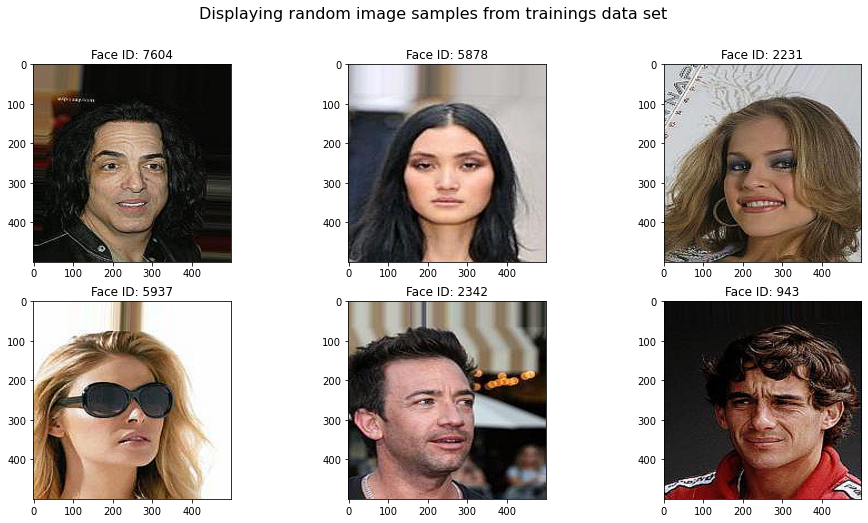

In [11]:
# Random image samples from data set
rows, columns = (2, 3)
fig, ax_arr = plt.subplots(rows, columns, figsize=(16,8))
local_rand_idx = iter(rand_idx)

for j, row in enumerate(ax_arr):
    for i, ax in enumerate(row):
        idx = next(local_rand_idx)
        img = train_dataset[idx][0]
        img = img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 9, -1, -1, -1, -1), 1, 0)) 
        ax.set_title(f'Face ID: {train_dataset[idx][1]}')
        ax.imshow(img)

fig.suptitle('Displaying random image samples from trainings data set', fontsize=16)
plt.show() 